確率勾配降下法（SGD）


W←W−η∂L／∂W
Wに関する損失関数の勾配＝∂L／∂W
η＝学習係数　　
式中の←は右辺の値で左辺の値を更新するという意味






In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]
            network = TwoLayerNet(...)
            
optimizer = SGD()

for i in range(10000) :
        ...
    x_bath, t_bath = get_mini_batch(...)
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    ...


Optimizer最適化実行者　パラメータの更新を遂行してくれる。

SGD

SGDの欠点は、関数の形状が等方的だと（伸びた形の関数だと）非効率的な経路で検索することになること

なお、上記の欠点の根本的な原因は、勾配の方向が本来の最小値ではない方向を指していることに起因する。
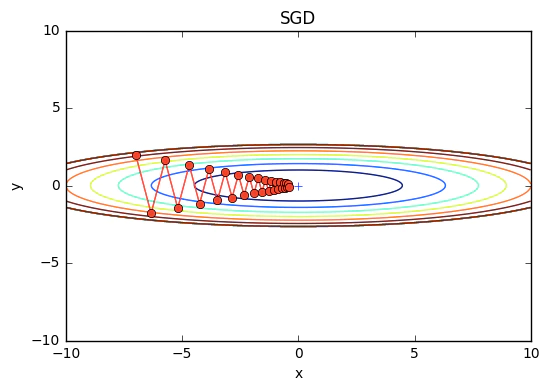
↑関数の形状が当方的でないとジグザグに動く＝非効率！

SGDにとって代わる手法として３つの手法がある
・Momentum
・AdaGrad
・Adam
SGDで時間がかかる、期待した結果が出ない場合は試してみよう。



Momentum

　モーメンタン（Momentum）とは「運動量」のこと
地面を転がるボールが、何も力を受けない時に徐々に摩擦や空気抵抗で減速するようなイメージ。

v←αv−η∂L／∂W
　　W←W+v
  
  Wに関する損失関数の勾配＝∂L／∂W
η＝学習係数　　
式中の←は右辺の値で左辺の値を更新するという意味



In [ ]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9): 
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr * grads[key]
            param[key] += self.v[key]

In [1]:
インスタンス変数のｖは物体の速度を保持する。
update()が初めてに呼ばれるときにパラメータと同じ構造のデータをディクショナリ変数として保持する。
残りは上記の２式書くだけ。
SGDよりジグザクの動きを軽減している。
　    

SyntaxError: invalid character '。' (U+3002) (Temp/ipykernel_5632/3456455294.py, line 1)

In [ ]:
この手法は学習係数の低減（learning rate decay）を行う
これは学習が進むにつれて学習係数を小さくするという手法です
Ada:適応的のAdaptiveに由来

h←h+∂L/∂W⊙∂L/∂W
W←W−η1h√∂L/∂W


1/√hを乗算することは、パラメータの更新の中でよく動いた（大きく更新された）要素は、学習係数が小さくなることを意味する

In [ ]:
class AdaGrad:
    def __init__(self, lr=0.01): 
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            param[key] += self.lr * grads[key] / (np.sqrt(self.h[key] + le-7)

In [ ]:
AdaGrad
この手法は学習係数の低減（learning rate decay）行う
これは学習が進むにつれて学習係数を小さくするという手法。パラメータごとに適応的に学習係数を調整しながら学習を行う手法でrある。
Ada:適応的のAdaptiveに由来

h←h+∂L/∂W⊙∂L/∂W     W←W−η/√h∂L/∂W

※ｗは重みパロメータ、∂L/∂W  はwに関する損失関数

1/√hを乗算することは、パラメータの更新の中でよく動いた（大きく更新された）要素は、学習係数が小さくなることを意味する

In [1]:
class AdaGrad:
    def __init__(self, lr=0.01): 
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            param[key] += self.lr * grads[key] / (np.sqrt(self.h[key] + le-7)

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_18624/787890713.py, line 14)

In [ ]:
重みの初期値



前提→重みは小さければ小さいほど過学習が抑えられる。（凡化性能が上がる）

そのために使うのが過学習を抑え、汎化性能を高めるテクニック、Weight decay（荷重減衰）
Weight decay：重みパラメータの値を小さくするように学習を行うことを目的とした手法
重みの値を小さくすることで、過学習が起きにくくなる。

重みを小さくしたいのであれば、初期値もできるだけ小さい値にするのが普通だが…
これまでの重みの初期値、0.01 * np.random.randn(10, 100)。
（標準偏差が0.01のガウス分布）

しかし重みは０にしてはならない。
理由は、誤差伝播法において、全ての重みの値が均一になってしまうから。
そのためランダムな初期値が必要になる。

隠れ層のアクティベーション分布（活性化関数の後の出力データ）
0と1に偏ったデータ
→逆伝播の勾配の値がどんどん小さくなって消えていく（勾配消失）

各ニューロンがほぼ同じ値を出力する
→アクティベーションの偏り
「表現力の制限」という問題になる

そのため程よくばらけている結果が望ましい

活性化関数にsigmoidを使用した際のアクティベーション分布の変化
image.png
重みの初期値として標準偏差1のガウス分布を用いた時の各層のアクティベーションの分布

image.png
重みの初期値として標準偏差0.01のガウス分布を用いた時の各層のアクティベーションの分布

image.png
重みの初期値としてXavierの初期値を用いた時の各層のアクティベーションの分布

image.png
重みの初期値としてHeの初期値を用いた時の各層のアクティベーションの分布

活性化関数にReLUを使用した際のアクティベーション分布の変化
image.png
重みの初期値として標準偏差1のガウス分布を用いた時の各層のアクティベーションの分布

image.png
重みの初期値として標準偏差0.01のガウス分布を用いた時の各層のアクティベーションの分布

image.png
重みの初期値としてXavierの初期値を用いた時の各層のアクティベーションの分布

image.png
重みの初期値としてHeの初期値を用いた時の各層のアクティベーションの分布

MNISTデータセットによる重みの比較
std=0.01の場合はほとんど学習が進んでいおらず
He、Xavierの際にはサクサク学習が進んでいる
→初期値の問題はとても重要である。

image.png

In [ ]:
過学習を防ぐ、正則化するために


原因は主に２つ。

１パラメータを大量に持ち、モデルの表現力が高すぎる
２訓練データが単純に少ない。

期待された結果ｄが出ないときは今一度確認してみよう。


In [4]:
Dropout＝過学習を防ぐ方法の一種


ニューロンをランダムに消去しながら学習する手法。


SyntaxError: invalid character '＝' (U+FF1D) (Temp/ipykernel_18624/3654681416.py, line 1)

In [ ]:
class Dropout:
        def __init__(self, dropout_ratio=0.5):
            self.dropout_ratio = dropout_ratio
            self.mask = None

        def forward(self, x, train_flg=True):
            if train_flg:
                self.mask = np.random.rand(*x.shape) > self.dropout_ratio
                return x * self.mask
            else
                return x * (1.0 - self.dropout_ratio)

        def backward(self, dout):
            return dout * self.mask
        
        
        